# Workshop 4: Python Statistics

In [15]:
#Standard Practice

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as spo
from scipy import stats

## Exercise 1: What do you Mean?

Create an array of 1000 random numbers with a Poisonnian distribution. Plot a histogram of your results. Then, calculate the mean and standard deviation of your distribution using both the built in python functions and with the known formulas for these values. Do your calculations match?

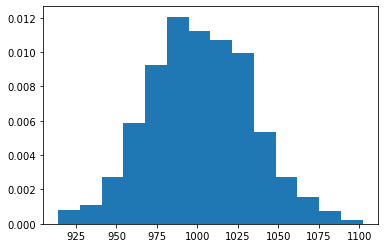

Mean = 1001.6
Median = 1001.0
Standard deviation = 31.8


In [19]:
i = np.random.poisson(1000,1000)
count, bins, ignored = plt.hist(i, 14, density=True)
plt.show()
# various measures of "average value":
print ('Mean = {0:3.1f}'.format(np.mean(i)))
print ('Median = {0:3.1f}'.format(np.median(i)))

# measure of the spread
print ('Standard deviation = {0:3.1f}'.format(np.std(i)))


## Exercise 2: Elemental Uncertainty

Pick 5 elements on the periodic table that have known isotopes (ex. Hydrogen has Deuterium, Carbon has Carbon 14, etc.). List the isotopes, along with their atomic mass, for each of your chosen elements. Then, create a scatterplot of atomic mass vs atomic number for your chosen elements, with error bars as determined by the variance of atomic masses that appear in the isotopes. Be sure to properly label your plot.

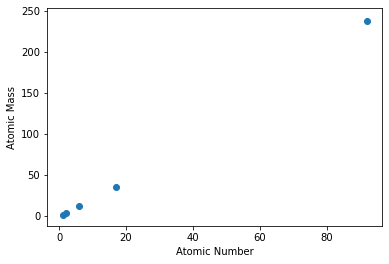

In [32]:
#Uranium-235
#Carbon-12
#Helium-3
#Hydrogen-2
#Chlorine-36

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

elements = np.array(['Uranium','Carbon','Helium','Hydrogen','Chlorine'])
isotopes = np.array (['Uranium-235','Carbon-12','Helium-3','Hydrogen-2','Chlorine-36'])
atomic_number = np.array([92, 6, 2, 1, 17])
element_mass = np.array([238.02891, 12.011, 4.002602, 1.00784, 35.453])
isotope_mass = np.array([235.0439299, 12, 3.016029, 2.0141017781, 36.9763])
sigma_raw = (element_mass - isotope_mass)
sigma = abs(sigma_raw)


plt.figure()
plt.errorbar(atomic_number, element_mass, xerr=0, yerr=sigma, fmt='o')
plt.xlabel('Atomic Number')
plt.ylabel('Atomic Mass')
#Remove the #, for the bottom 2 to see the error bars, Urainium makes it harder to see the rest of the bars.
#plt.xlim(0,30)
#plt.ylim(0,40)
plt.show()



## Exercise 3: Polynomial Fitting

The code in the cell immediately below will generate some data and store it an array of size `(500,3)` where the first column is $x$ values, the second column is the $y$ values, the third column is the uncertainty in each value. Use the techniques above to a quadratic model of the form
$$y = a_0 + a_1 x + a_2 x^2$$

Plot the data and your best fit curve with error and print out the values and their uncertainties

chi^2 =  4.38
chi^2/d.f.= 0.63


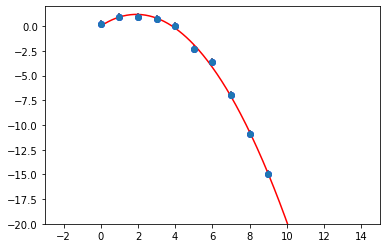

[ 0.00872686  1.23021692 -0.32097175]


In [11]:
# Generate artificial data for Exercise 6 and plot it

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
%matplotlib inline

# Generate artificial data = quadratic function with a0 = 0, a1=1, a2 = -0.3
# plus some noise.
a0 = 0.5
a1 = 1
a2 = -0.3
sig = 0.4
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0 + a1 * xdata + a2 * xdata **2 + sig * np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)


#############--------------################


def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([0.0, 4.0, 3.0])
par, cov = fitter.curve_fit(model2, xdata, ydata, par0, sigma)

corr = cov.copy()
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        

chi_squared = np.sum(((model2(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))


plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-3,15)
plt.ylim(-20,2)
xfit = np.linspace(0,50,1000)
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-')
plt.show()
print(par)



#Why is it only plotting half of the values?

## Exercise 4: Normal Distributions

1. Generate $N=100$ random numbers, Gaussian-distributed with $\mu=0$ and $\sigma=1$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation, and the error on the mean. Error on the Mean = $\frac{\sigma}{\sqrt{N}}$
1. Compute the median of this distribution
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of the means. Is it consistent with your calculation of the error on the mean for $N=100$ ? About how many experiments yield a result within $1\sigma$ of the true mean of 0 ? About how many are within $2\sigma$ ? Is this what you expected?
1. Now repeat question 5 for $N=10,50,1000,10000$. Plot a graph of the standard deviation of the distribution of the means vs $N$.

[ 1.93202584e-01 -1.25799145e+00 -1.30805563e-01  3.55862037e-01
  1.05936060e+00  3.26811193e-01  2.41575024e+00  2.70719682e-01
  3.61406360e-01  1.94848826e-01 -1.60356103e-01 -6.71930156e-01
 -2.97266179e-01 -1.42688075e-01 -6.91360787e-02  3.64493880e-01
 -3.77781499e-01  1.62308100e+00  3.69809903e-01  4.56432105e-01
  1.31471208e-01 -2.38183619e-01 -1.56341628e+00  1.41772702e+00
 -1.57203016e+00 -8.90650293e-01 -1.95129847e+00  9.75464003e-01
 -4.77618742e-01 -3.90462709e-02 -1.17352272e-01  2.36301607e+00
  1.05010733e+00  6.46139766e-01  1.69046332e-01 -1.73025763e+00
 -4.73752293e-01  1.78339059e+00  1.02769888e+00 -7.33296123e-01
  1.87351530e+00 -3.03491943e-01  1.67421713e+00  7.76863263e-01
  1.57644252e+00 -2.93141544e-01  2.48575743e-01  3.66736743e-01
  2.23528927e+00 -4.17509114e-01 -7.14473425e-01  1.76803543e+00
  4.92259580e-01  2.67427886e-01  7.98309715e-01  6.81551483e-01
  6.07116219e-01 -4.29883049e-01 -5.63326440e-01 -1.58248062e-02
  1.90146344e-02 -1.51134

/tmp/ipykernel_24/316368584.py:23: RuntimeWarning: invalid value encountered in sqrt
  eom_1 = (sigma/(np.sqrt(n_2)))


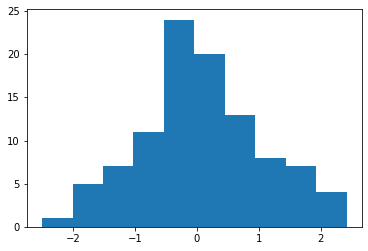

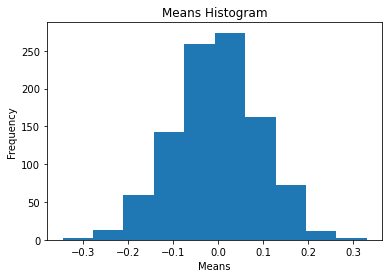

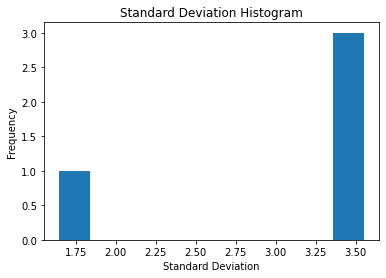

In [23]:
##########----Subproblem 1------------################
mu = 0
sigma = 1
n = mu + sigma*np.random.randn(100)
print(n)
##########----Subproblem 2------------################
n, bins, patches = plt.hist(n)
##########----Subproblem 3------------################
print ('Mean = {0:5.2f}'.format(np.mean(n)))
print ('Standard deviation = {0:5.1f}'.format(np.std(n)))
eom = (sigma/(np.sqrt(n)))
print ('Error of mean =',eom)
##########----Subproblem 4------------################
print ('Median = {0:5.2f}'.format(np.median(n)))
##########----Subproblem 5------------################
sd = []
mean = []
eom_list = []

for i in range (0,1000):
    n_2 = mu + sigma*np.random.randn(100)
    mean_1 = np.mean(n_2)
    eom_1 = (sigma/(np.sqrt(n_2)))
    sd_2 = np.std(n_2)
    sd.append(sd_2)
    mean.append(mean_1)
    eom_list.append(eom_1)
    
plt.figure()
plt.hist(mean)
plt.title('Means Histogram')
plt.xlabel('Means')
plt.ylabel('Frequency')
plt.show()


n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
s_array = np.array(s)

sigma = 1


plt.figure()

####std_10
n, p = 10 , .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
s_array = np.array(s)
std_10 = np.std(s)

###std_50
n, p = 50 , .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
s_array = np.array(s)
std_50 = np.std(s)

###std_1000
n, p = 50 , .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
s_array = np.array(s)
std_1000 = np.std(s)
###std_10000
n, p = 50 , .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
s_array = np.array(s)
std_10000 = np.std(s)

std = np.array([std_10, std_50, std_1000, std_10000])
plt.hist(std)
plt.title('Standard Deviation Histogram')
plt.ylabel('Frequency')
plt.xlabel('Standard Deviation')
plt.plot();

In [ ]:
#Lists of the means, sd, and eom of all 1000 samples: Run this cell, BEWARE: It will cluter the Juypter Notebook
print(sd)
print(mean)
print(eom_list)

## Exercise 5: Binomial Distribution

The binomial distribution with parameters $n$ and $p$ is the *discrete* probability distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. A typical example is a distribution of the number of *heads* for $n$ coin flips ($p=0.5$) 

The function `np.random.binomial(n,p)` requires two arguments, `n` the number of events in a single trial and `p` the probability of the desired outcome. `size` is another optional keyword argument.
1. Generate an array of outcomes for flipping 1 unbiased coin 10 times.
1. Plot the outcomes in a histogram (0=heads, 1=tails). 
1. Compute mean, standard deviation, and the error on the mean. Is this what you expected?

[ 5  5  6  4  5  7  7  3  6  5  4  7  8  4  3  3  7  9  4  6  7  7  7  5
  3  2  3  3  6  5  7  6  6  3  6  5  3  5  4  4  2  6  7  6  7  7  3  5
  5  5  7  3  4  4  6  4  3  6  7  6  5  4  4  4  3  6  7  2  6  1  5  4
  6  7  3  6  4  5  4  5  5  8  3  3  4  4  5  2  6  6  4  5  5  5  4  2
  6  4  8  7  5  7  4  2  2  4  8  3  6  6  5  6  7  6  5  4  4  7  4  8
  5  6  4  4  6  8  6  3  6  5  7  3  5  6  2  9  3  4  6  4  7  8  7  4
  5  4  5  7  6  6  3  5  5  7  4  5  6  2  6  6  5  6  5  6  9  6  6  4
  2  4  3  6  3  3  5  2  7  3  5  5  4  6  5  8  5  4  7  6  5  5  3  7
  6  6  7  5  5  4  6  4  8  6  5  5  5  6  5  5  5  7  7  4  7  8  3  5
  7  4  4  5  4  6  4  5  3  6  6  7  6  4  4  7  5  4  7  6  2  7  4  6
  4  6  4  1  6  7  4  4  6  6  6  7  4  4  6  3  3  4  6  8  6  6  5  4
  7  4  6  6  4  4  4  3  6  5  2  3  3  7  4  7  3  5  6  3  7  5  5  5
  2  5  7  6  5  6  8  7  6  5  3  2  7  7  7  5  7  6  2  3  6  3  4  6
  3  6  4  6  6  5  5  7  5  6  5  5  5  4  8  6  8

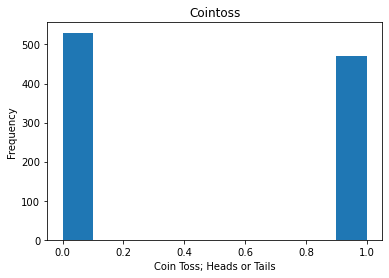

Mean = 5.1
Error of mean = [0.4472136  0.4472136  0.40824829 0.5        0.4472136  0.37796447
 0.37796447 0.57735027 0.40824829 0.4472136  0.5        0.37796447
 0.35355339 0.5        0.57735027 0.57735027 0.37796447 0.33333333
 0.5        0.40824829 0.37796447 0.37796447 0.37796447 0.4472136
 0.57735027 0.70710678 0.57735027 0.57735027 0.40824829 0.4472136
 0.37796447 0.40824829 0.40824829 0.57735027 0.40824829 0.4472136
 0.57735027 0.4472136  0.5        0.5        0.70710678 0.40824829
 0.37796447 0.40824829 0.37796447 0.37796447 0.57735027 0.4472136
 0.4472136  0.4472136  0.37796447 0.57735027 0.5        0.5
 0.40824829 0.5        0.57735027 0.40824829 0.37796447 0.40824829
 0.4472136  0.5        0.5        0.5        0.57735027 0.40824829
 0.37796447 0.70710678 0.40824829 1.         0.4472136  0.5
 0.40824829 0.37796447 0.57735027 0.40824829 0.5        0.4472136
 0.5        0.4472136  0.4472136  0.35355339 0.57735027 0.57735027
 0.5        0.5        0.4472136  0.70710678 0.4082482

In [66]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
s_array = np.array(s)
print(s_array)
ht_storage = []


for i in s:
    if i%2 == 1:
        ht_storage.append(1)
    else:
        ht_storage.append(0)

        
sigma = 1
plt.figure();
plt.hist(ht_storage);
plt.xlabel('Coin Toss; Heads or Tails')
plt.ylabel('Frequency')
plt.title('Cointoss')
plt.show();

print ('Mean = {0:3.1f}'.format(np.mean(s)))
eom_s = (sigma/(np.sqrt(s)))
print ('Error of mean =',eom_s)

# measure of the spread
print ('Standard deviation = {0:3.1f}'.format(np.std(s)))
print('Yes, I expected it')


## Exercise 6: Root Finding

Consider a sixth-order polynomial: 

$f(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1$

There is no general formula for the roots of a polynomial of degree 6, but you can compute the roots numerically.

Make a plot of  from  to  and by inspecting it find rough values for the six roots of the polynomial.
Write the code to solve for the positions of all six roots to at least ten decimal places using at least one of the methods dsicussed in class. (you can/should use the built-in functions).
Hint: I would recommend using fsolve in the scipy library

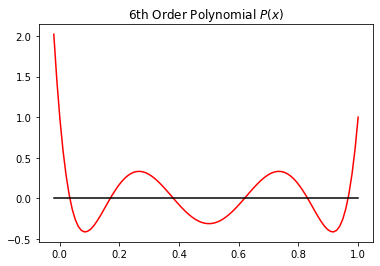

array([0.03376524, 0.16939531, 0.38069041, 0.61930959, 0.83060469,
       0.83060469])

In [62]:
from scipy.optimize import fsolve

def func(x):
    y = 924 * x**6 - 2772 * x**5 + 3150 * x**4 - 1680 * x**3 + 420 * x**2 - 42 * x + 1
    return y


x = np.linspace(-0.02, 1.0,100)
zer = np.zeros(100)
plt.figure()
plt.title("6th Order Polynomial $P(x)$")
plt.plot(x,func(x),"r-",label="P(x)")
plt.plot(x,zer,"k-",label="y=0")
plt.plt
plt.show()

roots = fsolve(P, [0.03, 0.18, 0.4, 0.58, 0.82, 0.9])
roots


## Exercise 7: Optical Pumping

One of the experiments in the Physics 111B lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.94 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line and draw the best-fit line through the data points in the graph.
1. From what they know about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.03 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


Value if its sigma(f) is 0.01 Mhz
chi^2 = 1517.99
chi^2/d.f.=151.80
Why is the chi^2 reduced so big?, and no matter what I change the par value, it keeps staying at 151.80
Value if its sigma(f) is 1 Mhz
chi^2 =  0.15
chi^2/d.f.= 0.02
The model's parameters and their uncertainties are the following: 

Current = 0.040+/-0.067 

Frequency = 3.054+/-0.052 


Revised Chi^2, using Sigma(f) = 0.03f + 0.03
chi^2 = 11.72
chi^2/d.f.= 1.17


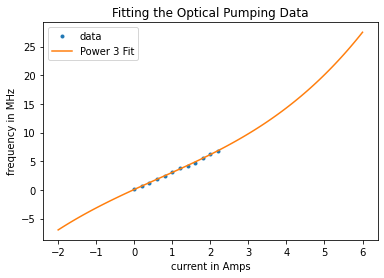

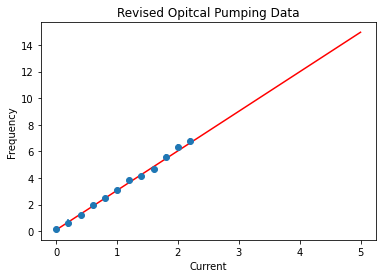

In [77]:
current = np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2]) #In Amps
frequency = np.array([0.14, 0.60, 1.21, 1.94, 2.47, 3.07, 3.83, 4.16, 4.68, 5.60, 6.31, 6.78]) #In MHz

z = np.polyfit(current, frequency , 3)
p = np.poly1d(z)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p30 = np.poly1d(np.polyfit(current, frequency, 30))
import matplotlib.pyplot as plt
xp = np.linspace(-2, 6, 100)
plt.plot(current, frequency, '.', label='data')
plt.plot(xp, p(xp), '-', label='Power 3 Fit')
plt.title('Fitting the Optical Pumping Data')
plt.ylabel('frequency in MHz')
plt.xlabel('current in Amps')
plt.legend()

sigma = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]) #Mhz
sigma = np.poly1d(sigma)

def model(x, a, b):
    return a + b*x

#Sigma = 0.01 MHz
par0    = np.array([0.1, 0.4])
par, cov = spo.curve_fit(model, current, frequency, p0=par0, sigma=sigma)
chi_squared = np.sum(((model(current, *par)-frequency)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(current)-len(par))
print('Value if its sigma(f) is 0.01 Mhz')
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))
print('Why is the chi^2 reduced so big?, and no matter what I change the par value, it keeps staying at 151.80')

#Sigma = 1.0 MHz
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0, 1.0,1.0,1.0,1.0,1.0,1.0]) #Mhz
sigma = np.poly1d(sigma)
chi_squared = np.sum(((model(current, *par)-frequency)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(current)-len(par))
print('Value if its sigma(f) is 1 Mhz')
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))


# Sub-Problem 4????

#
#x_fitted = model(current, par[0], par[1])
#residuals = x_fitted - current
#plt.figure()
#plt.plot(current, residuals, '.')
#print(np.mean(residuals))
#plt.show()

print("The model's parameters and their uncertainties are the following: \n")
a = par[0]
ea = np.sqrt(cov[0,0])
print('Current ={0:6.3f}+/-{1:5.3f} \n'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('Frequency ={0:6.3f}+/-{1:5.3f} \n\n'.format(b,eb))


#Sub - Problem 5?
sigma = np.array([0.0342, 0.318, 0.0363, 0.0882, 0.1041, 0.1221, 0.1449, 0.1518, 0.1704, 0.198, 0.2193, 0.2334])

def model(x, a, b):
    return a + b*x

par0    = np.array([0.0, 1.0])
par, cov = spo.curve_fit(model, current, frequency, p0=par0, sigma=sigma)
corr = cov.copy() # copy shape
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
chi_squared = np.sum(((model(current, *par)-frequency)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(current)-len(par))
print('Revised Chi^2, using Sigma(f) = 0.03f + 0.03')
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))



# overlay plot over data
plt.figure()
plt.errorbar(current, frequency, xerr=0, yerr=sigma, fmt='o')
xfit = np.linspace(0,5,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.title('Revised Opitcal Pumping Data')
plt.ylabel('Frequency')
plt.xlabel('Current')
plt.show()
